In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/pintu/Desktop/Mario/Visual Studio/Python/Projects/venv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# LOAD DATA

In [2]:
PATH_MODEL_HISTORIES = 'model_histories.csv'

In [3]:
df = pd.read_csv(PATH_MODEL_HISTORIES, index_col='Epochs')

# clean string columns
df = df.applymap(lambda s:s.replace('s', '') if type(s)==str else s)
df = df.astype(float)

df

,data__preprocessed__densenet201-imagenet__time,data__preprocessed__densenet201-imagenet__train_loss,data__preprocessed__densenet201-imagenet__train_accuracy,data__preprocessed__densenet201-imagenet__val_loss,data__preprocessed__densenet201-imagenet__val_accuracy,data__preprocessed__densenet201__time,data__preprocessed__densenet201__train_loss,data__preprocessed__densenet201__train_accuracy,data__preprocessed__densenet201__val_loss,data__preprocessed__densenet201__val_accuracy,...,data__raw__resnet50__time,data__raw__resnet50__train_loss,data__raw__resnet50__train_accuracy,data__raw__resnet50__val_loss,data__raw__resnet50__val_accuracy,data__raw__xception__time,data__raw__xception__train_loss,data__raw__xception__train_accuracy,data__raw__xception__val_loss,data__raw__xception__val_accuracy
Epochs,,,,,,,,,,,,,,,,,,,,,
1,211.0,1.4167,0.5133,1.1370,0.6009,205.0,1.6296,0.3783,1.5754,0.3979,...,250.0,1.935900,0.2954,3.1136,0.2264,257.0,1.6770,0.3338,1.7827,0.2562
2,110.0,1.0552,0.6115,1.1116,0.6058,116.0,1.3049,0.5092,9.6084,0.1652,...,150.0,1.695000,0.3545,2.1735,0.1818,152.0,1.3844,0.4549,1.7404,0.4417
3,110.0,0.9488,0.6501,1.0079,0.6399,116.0,1.0632,0.5966,3.6587,0.3094,...,149.0,1.520200,0.4141,2.4170,0.3065,150.0,1.2434,0.5138,1.9374,0.4423
4,111.0,0.8918,0.6670,0.9935,0.6510,115.0,0.9306,0.6494,10.9495,0.2314,...,147.0,1.377100,0.4715,3.3877,0.2053,151.0,1.1020,0.5754,1.6812,0.4349
5,111.0,0.8609,0.6748,1.0285,0.6436,116.0,0.8361,0.6811,5.5330,0.2729,...,146.0,1.290900,0.5001,1.9573,0.3970,151.0,0.9524,0.6373,1.2905,0.5614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,105.0,0.6557,0.7522,1.4001,0.6355,111.0,0.0308,0.9912,1.6186,0.7308,...,143.0,0.000410,0.9998,2.6431,0.6141,145.0,0.0261,0.9910,2.0727,0.6421
97,108.0,0.6703,0.7449,1.3517,0.6399,113.0,0.0118,0.9968,1.2993,0.7704,...,143.0,0.000303,0.9998,2.7277,0.6179,145.0,0.0074,0.9980,2.1949,0.6718
98,106.0,0.6575,0.7524,1.3750,0.6337,112.0,0.0090,0.9973,1.5937,0.7704,...,144.0,0.000251,0.9999,2.6934,0.6160,146.0,0.0096,0.9964,2.4008,0.6644


# ACCURACY SCORE

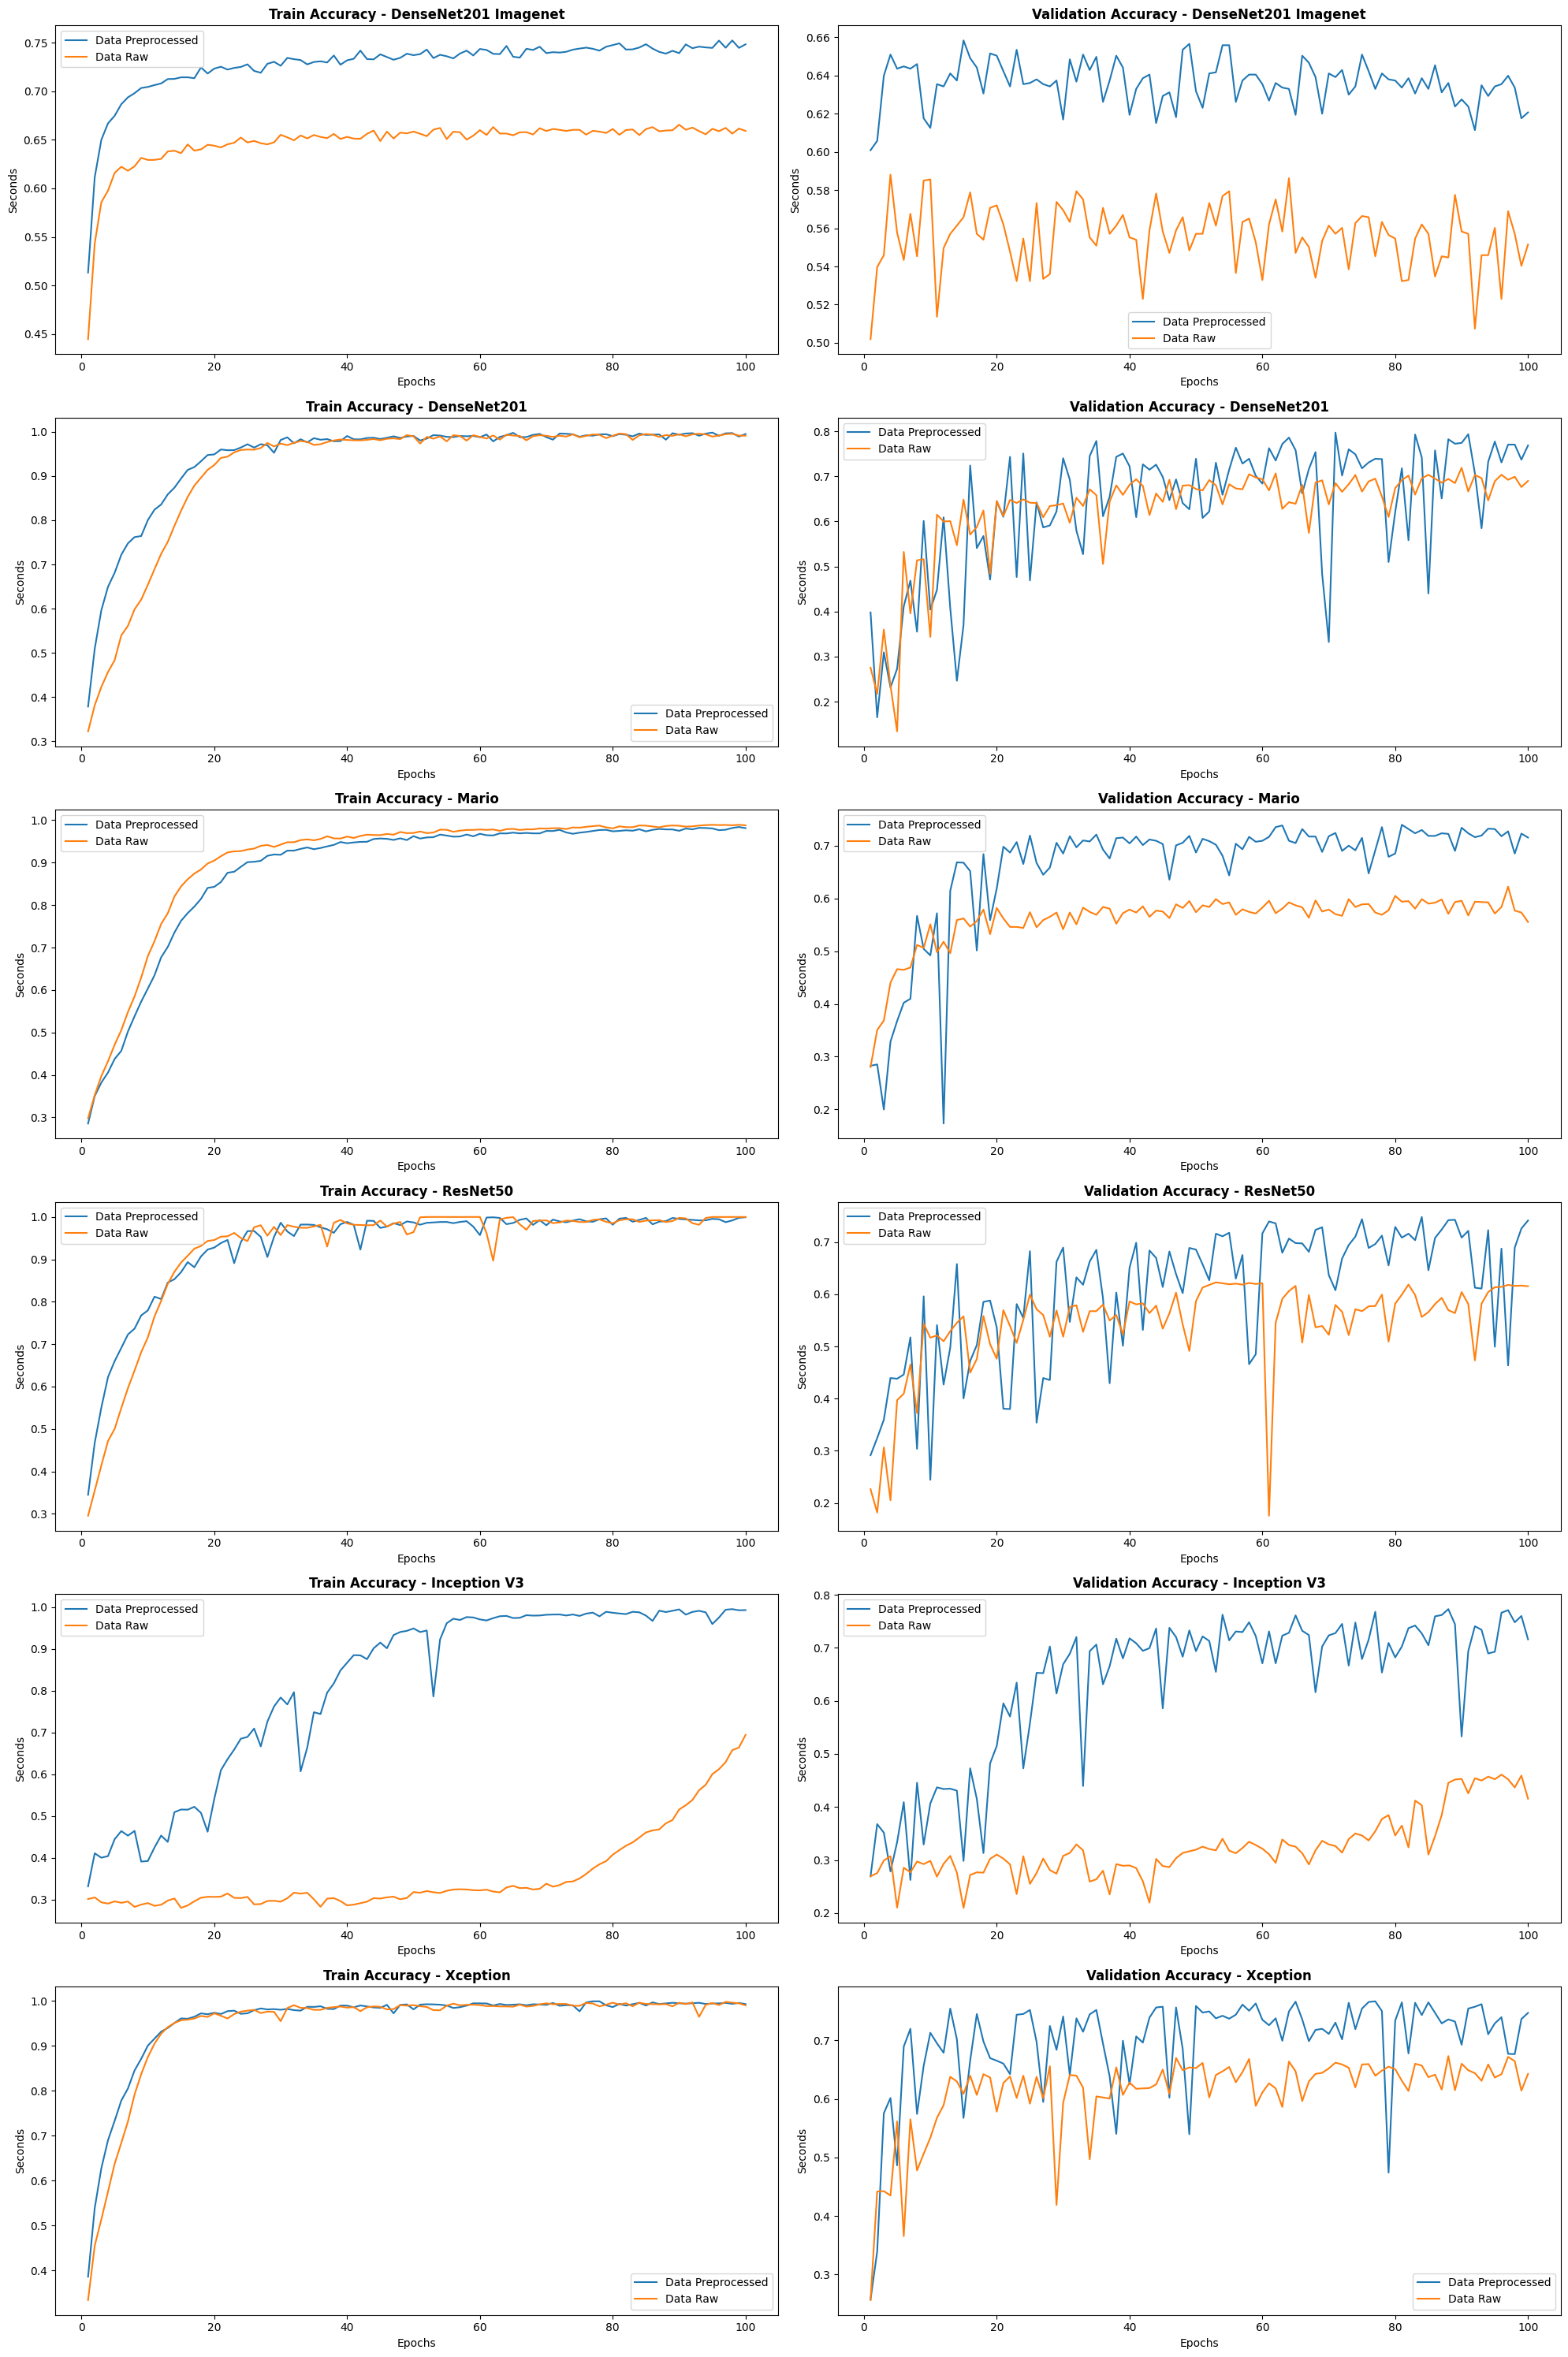

In [8]:
fig, ax = plt.subplots(6, 2, figsize=(20, 30))
ax = ax.flatten()

list_models = ['densenet201-imagenet', 'densenet201', 'mario', 'resnet50', 'inception-v3', 'xception']
list_model_names = ['DenseNet201 Imagenet', 'DenseNet201', 'Mario', 'ResNet50', 'Inception V3', 'Xception']

for i in range(6):
    sns.lineplot(data=df, x=df.index, y=df[f'data__preprocessed__{list_models[i]}__train_accuracy'], ax=ax[2*i], label='Data Preprocessed')
    sns.lineplot(data=df, x=df.index, y=df[f'data__raw__{list_models[i]}__train_accuracy'], ax=ax[2*i], label='Data Raw')
    sns.lineplot(data=df, x=df.index, y=df[f'data__preprocessed__{list_models[i]}__val_accuracy'], ax=ax[2*i + 1], label='Data Preprocessed')
    sns.lineplot(data=df, x=df.index, y=df[f'data__raw__{list_models[i]}__val_accuracy'], ax=ax[2*i + 1], label='Data Raw')
    ax[2*i].set_title(f'Train Accuracy - {list_model_names[i]}', fontweight='bold')
    ax[2*i + 1].set_title(f'Validation Accuracy - {list_model_names[i]}', fontweight='bold')

for i in range(12):
    ax[i].set_ylabel('Seconds')

plt.tight_layout()

# LOSS VALUES

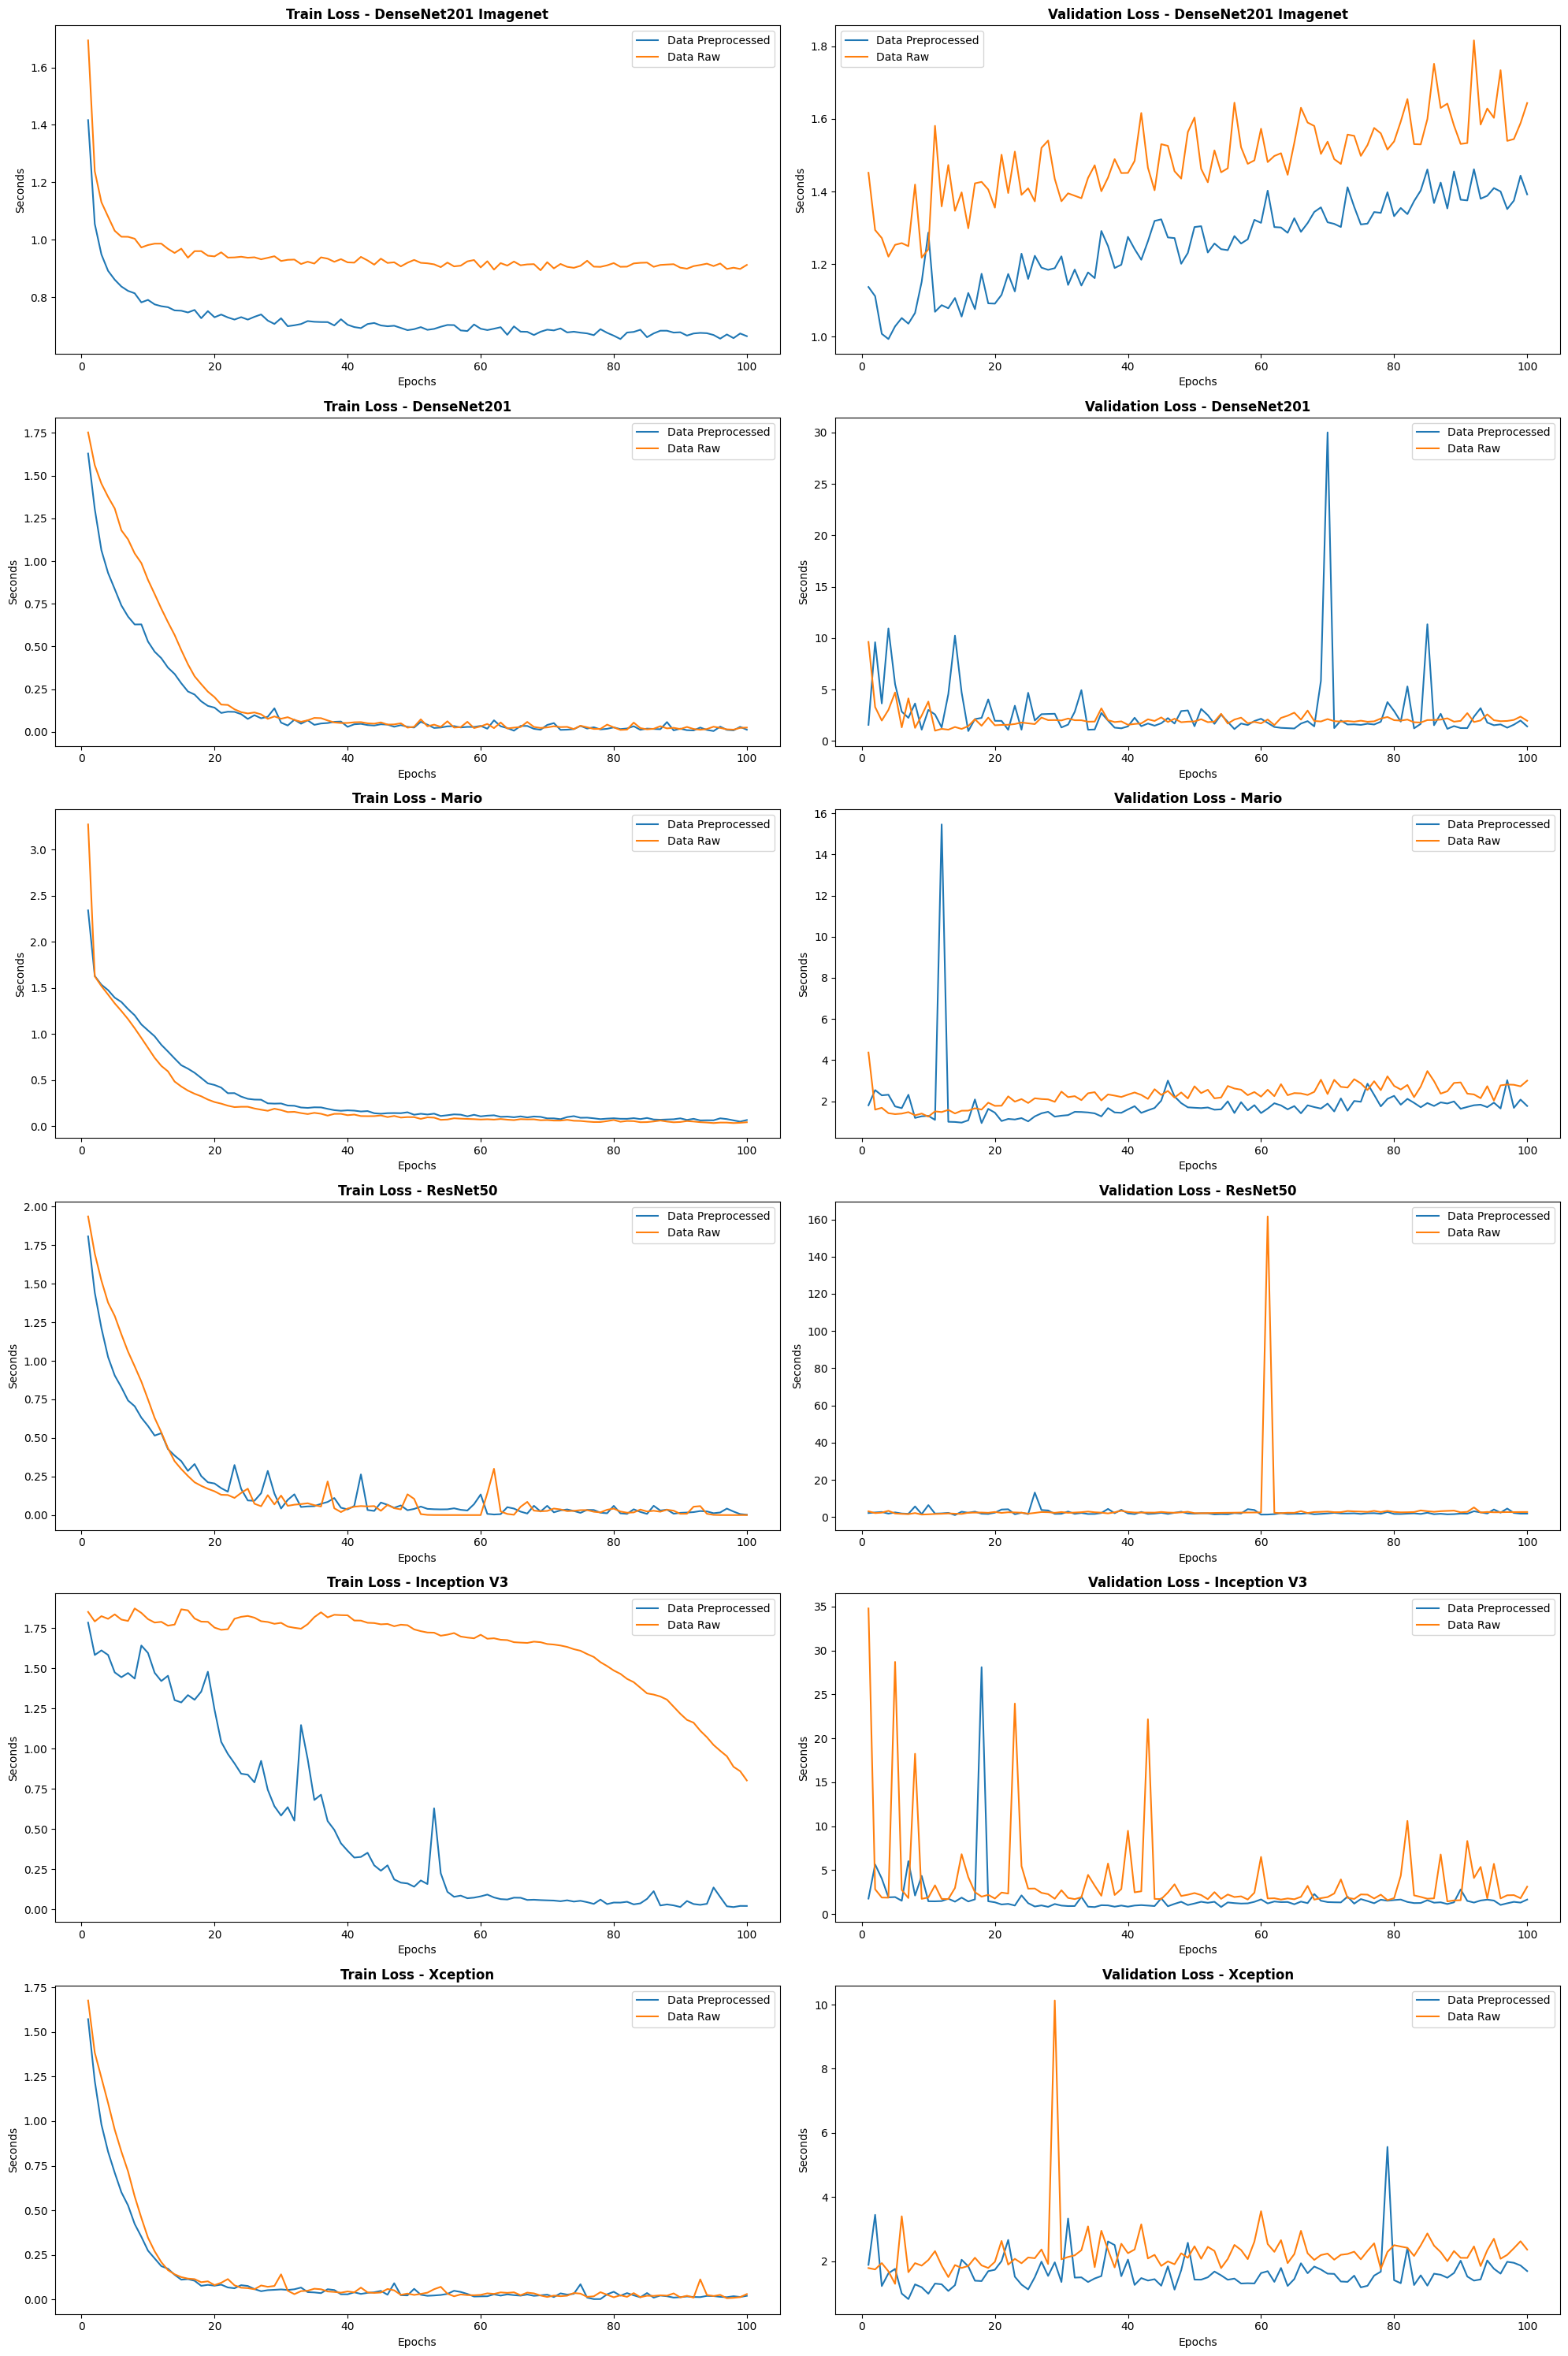

In [5]:
fig, ax = plt.subplots(6, 2, figsize=(20, 30))
ax = ax.flatten()

list_models = ['densenet201-imagenet', 'densenet201', 'mario', 'resnet50', 'inception-v3', 'xception']
list_model_names = ['DenseNet201 Imagenet', 'DenseNet201', 'Mario', 'ResNet50', 'Inception V3', 'Xception']

for i in range(6):
    sns.lineplot(data=df, x=df.index, y=df[f'data__preprocessed__{list_models[i]}__train_loss'], ax=ax[2*i], label='Data Preprocessed')
    sns.lineplot(data=df, x=df.index, y=df[f'data__raw__{list_models[i]}__train_loss'], ax=ax[2*i], label='Data Raw')
    sns.lineplot(data=df, x=df.index, y=df[f'data__preprocessed__{list_models[i]}__val_loss'], ax=ax[2*i + 1], label='Data Preprocessed')
    sns.lineplot(data=df, x=df.index, y=df[f'data__raw__{list_models[i]}__val_loss'], ax=ax[2*i + 1], label='Data Raw')
    ax[2*i].set_title(f'Train Loss - {list_model_names[i]}', fontweight='bold')
    ax[2*i + 1].set_title(f'Validation Loss - {list_model_names[i]}', fontweight='bold')

for i in range(12):
    ax[i].set_ylabel('Seconds')

plt.tight_layout()

# TRAINING TIMES

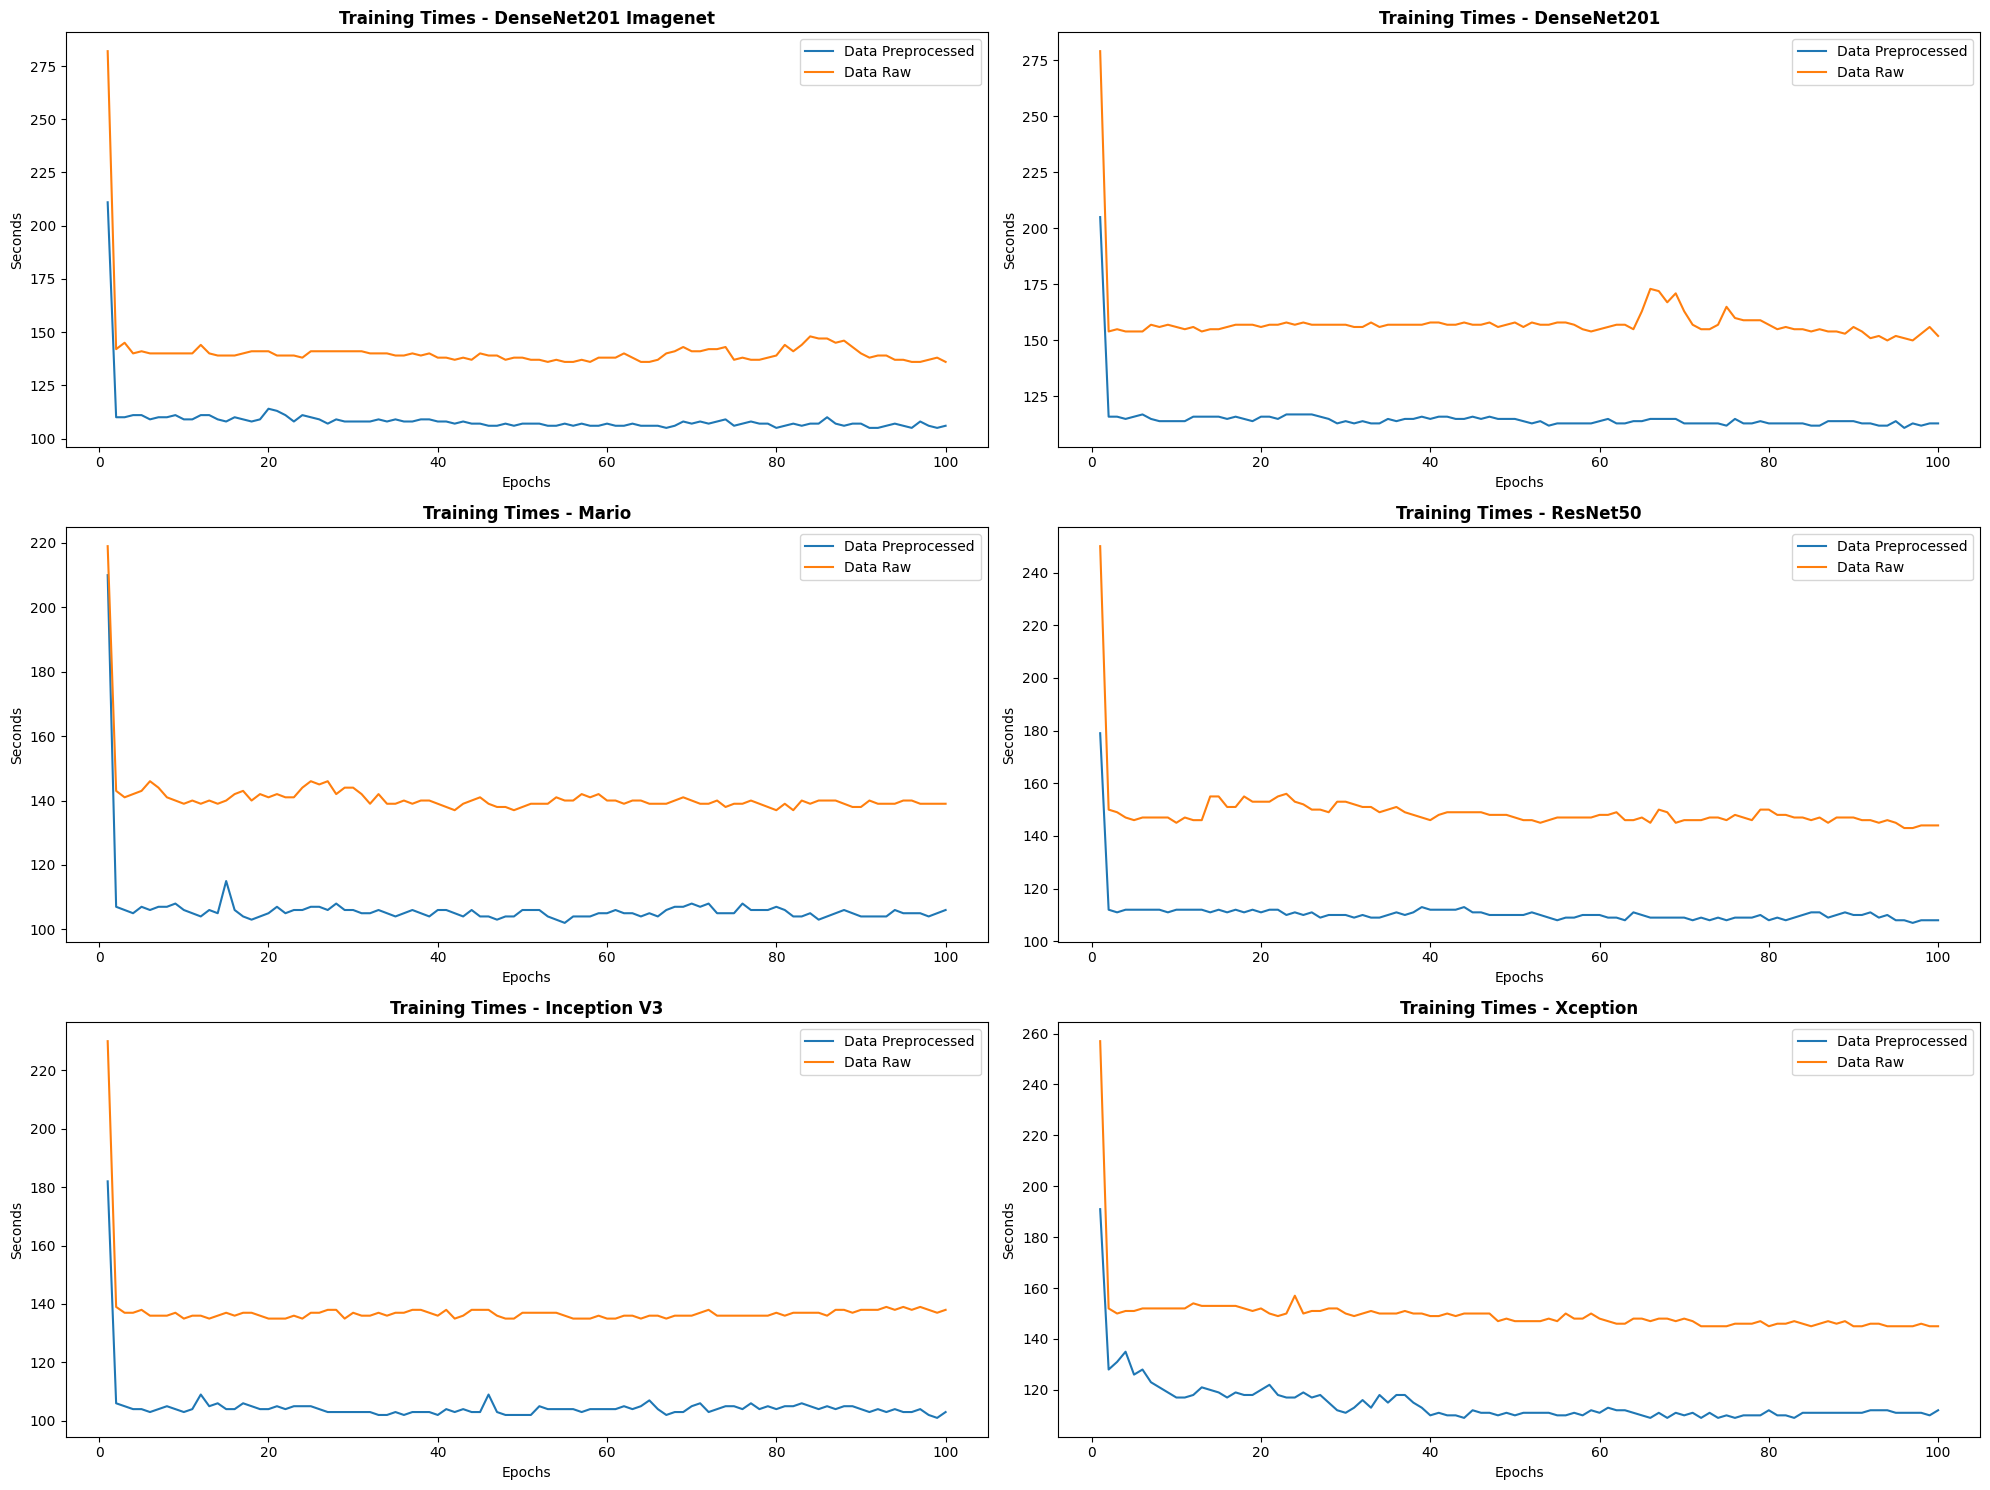

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
ax = ax.flatten()

list_models = ['densenet201-imagenet', 'densenet201', 'mario', 'resnet50', 'inception-v3', 'xception']
list_model_names = ['DenseNet201 Imagenet', 'DenseNet201', 'Mario', 'ResNet50', 'Inception V3', 'Xception']

for i in range(6):
    sns.lineplot(data=df, x=df.index, y=df[f'data__preprocessed__{list_models[i]}__time'], ax=ax[i], label='Data Preprocessed')
    sns.lineplot(data=df, x=df.index, y=df[f'data__raw__{list_models[i]}__time'], ax=ax[i], label='Data Raw')
    ax[i].set_title(f'Training Times - {list_model_names[i]}', fontweight='bold')

for i in range(6):
    ax[i].set_ylabel('Seconds')

plt.tight_layout()